In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.graph_objects as go

In [9]:
surface = pd.read_csv("saveStorage/optionMap_2022-11-01.csv", index_col=0).astype(float)
surface.columns = pd.to_datetime(surface.columns, format='%d%b%y')
surface = surface.T.sort_index().T
surface

,2022-11-02,2022-11-03,2022-11-04,2022-11-11,2022-11-18,2022-11-25,2022-12-30,2023-01-27,2023-03-31,2023-06-30,2023-09-29
5000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.7530,NaN,0.7390,NaN,0.7710
8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5045,NaN,0.5360,0.5330,NaN
11000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4920,NaN,NaN
12000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.3850,NaN,NaN,NaN,NaN
13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5095,0.4120,0.4315
14000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.3110,NaN,0.3610,0.3885,0.4150
15000.0,NaN,NaN,0.2300,0.2300,NaN,NaN,0.2940,NaN,0.3100,0.3670,0.3910
16000.0,NaN,NaN,NaN,NaN,NaN,NaN,0.2400,NaN,0.2677,0.3250,0.3650
16500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def plot_function_surface(z_data):
    import plotly.graph_objects as go
    z = z_data.values
    x, y = z_data.index, z_data.columns
    fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
    fig.update_layout(title='Surface of OptionPrices', autosize=False,
                      width=500, height=500,
                      margin=dict(l=65, r=50, b=65, t=90))
    fig.show()
plot_function_surface(surface)

In [11]:
X = []
Y = []
Z = []
rows = surface.shape[1]
lines = surface.shape[0]
for index in surface.index[:-10]:
    line = surface.loc[index, :]
    X.extend(rows * [index])
    Y.extend(surface.columns)
    Z.extend(line.values)

fig = go.Figure(data=[go.Scatter3d(
    x=X,
    y=Y,
    z=Z,
    mode='markers',
    marker=dict(
        size=4,
        color=Z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene= dict(
                          xaxis_title="Strike",
                          yaxis_title="Maturity",
                          zaxis_title="Price",
                          ),
                          width=400, height=400,
                          margin=dict(l=25, r=25, b=25, t=30),
                              font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.show()

In [5]:
surface.columns

DatetimeIndex(['2022-10-30', '2022-10-31', '2022-11-04', '2022-11-11',
               '2022-11-18', '2022-11-25', '2022-12-30', '2023-01-27',
               '2023-03-31', '2023-06-30', '2023-09-29'],
              dtype='datetime64[ns]', freq=None)

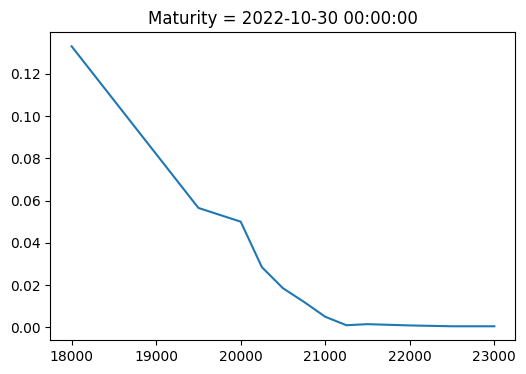

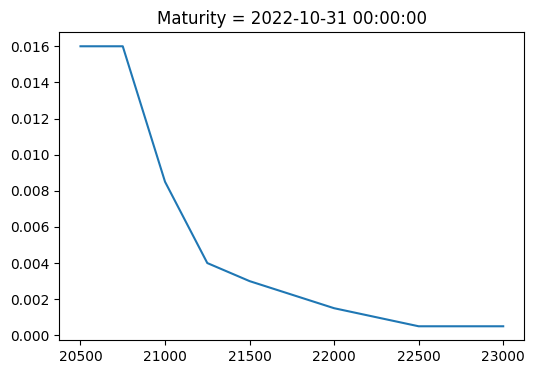

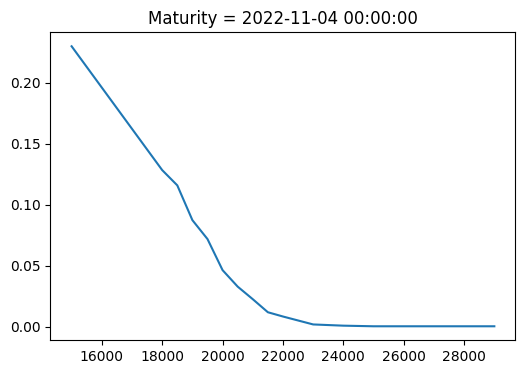

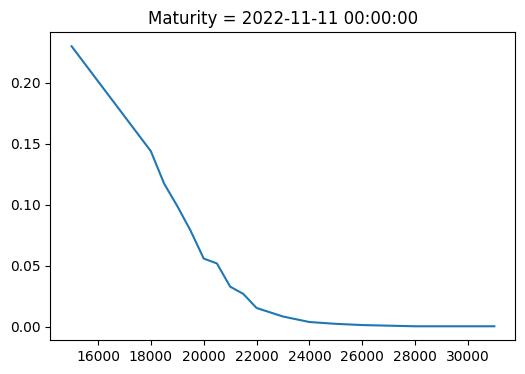

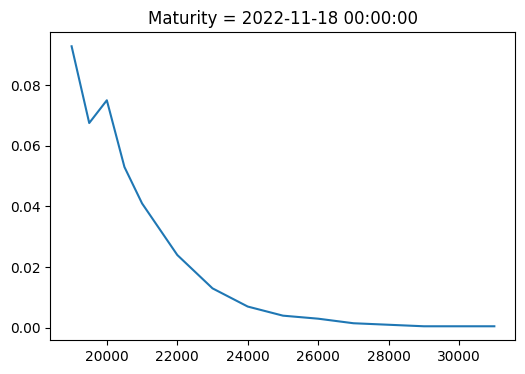

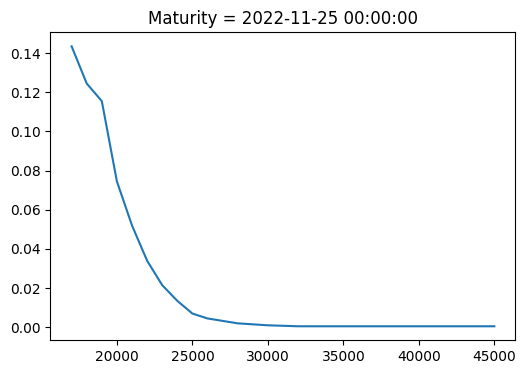

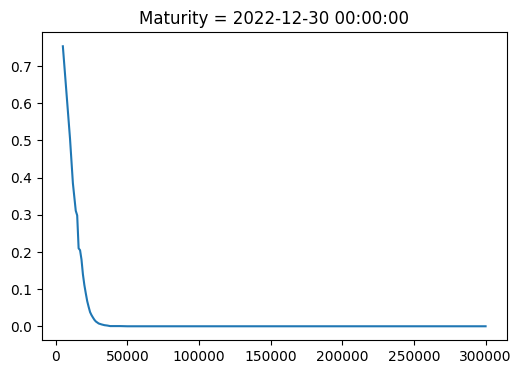

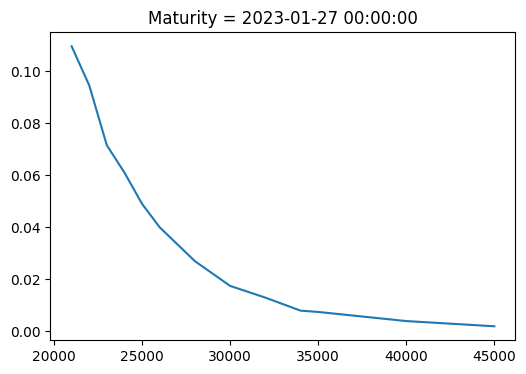

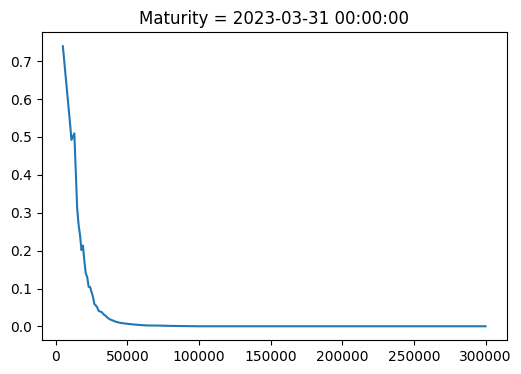

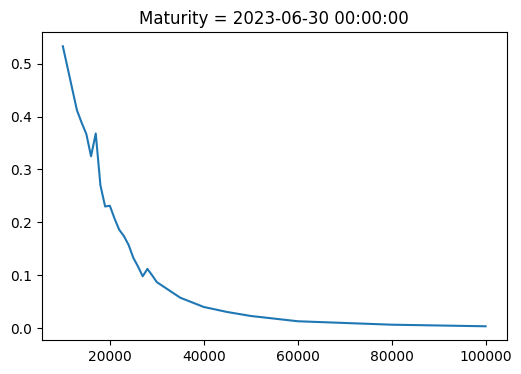

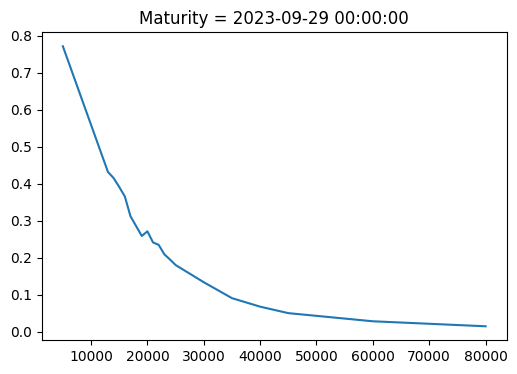

In [6]:
for column in surface.columns:
    plt.figure(figsize=(6, 4))
    plt.title(f"Maturity = {column}")
    surface.loc[:,column].dropna().plot()
    plt.show()